In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
import yfinance as yf

In [21]:
start = '2010-01-01'
end = '2019-12-31'

df = yf.download('AAPL', start, end)
df.head()

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2010-01-04,6.447411,6.462173,6.398304,6.429937,493729600
2010-01-05,6.458560,6.495013,6.424516,6.465188,601904800
2010-01-06,6.355826,6.484166,6.349198,6.458558,552160000
2010-01-07,6.344078,6.386858,6.297984,6.379326,477131200
2010-01-08,6.386256,6.386859,6.298287,6.335643,447610800


In [22]:
df.tail()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2019-12-23,68.833244,68.893837,67.953438,67.992218,98572000
2019-12-24,68.898697,69.048973,68.571502,69.000496,48478800
2019-12-26,70.265671,70.282638,69.002922,69.032005,93121200
2019-12-27,70.238998,71.249687,69.831818,70.558929,146266000
2019-12-30,70.655884,70.939461,69.128952,70.156601,144114400


In [23]:
df = df.reset_index()

In [24]:
df.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL
0,2010-01-04,6.447411,6.462173,6.398304,6.429937,493729600
1,2010-01-05,6.458560,6.495013,6.424516,6.465188,601904800
2,2010-01-06,6.355826,6.484166,6.349198,6.458558,552160000
3,2010-01-07,6.344078,6.386858,6.297984,6.379326,477131200
4,2010-01-08,6.386256,6.386859,6.298287,6.335643,447610800


In [25]:
df = df.drop(['Date'], axis=1)

C:\Users\hp\AppData\Local\Temp\ipykernel_25228\3771822584.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df = df.drop(['Date'], axis=1)


In [26]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
0,6.447411,6.462173,6.398304,6.429937,493729600
1,6.458560,6.495013,6.424516,6.465188,601904800
2,6.355826,6.484166,6.349198,6.458558,552160000
3,6.344078,6.386858,6.297984,6.379326,477131200
4,6.386256,6.386859,6.298287,6.335643,447610800


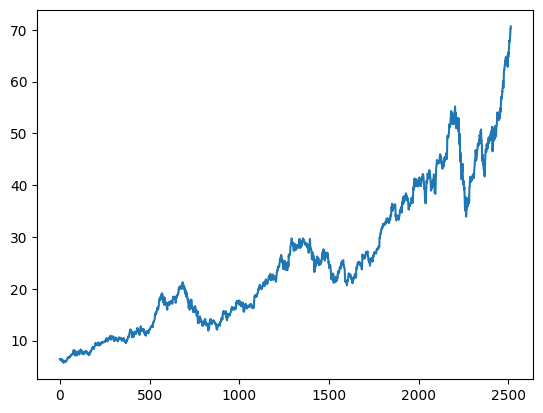

In [28]:
plt.plot(df.Close)

In [29]:
df

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
0,6.447411,6.462173,6.398304,6.429937,493729600
1,6.458560,6.495013,6.424516,6.465188,601904800
2,6.355826,6.484166,6.349198,6.458558,552160000
3,6.344078,6.386858,6.297984,6.379326,477131200
4,6.386256,6.386859,6.298287,6.335643,447610800
...,...,...,...,...,...
2510,68.833244,68.893837,67.953438,67.992218,98572000
2511,68.898697,69.048973,68.571502,69.000496,48478800
2512,70.265671,70.282638,69.002922,69.032005,93121200


In [30]:
ma100 = df.Close.rolling(100).mean()
ma100

Ticker,AAPL
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
2510,57.275742
2511,57.473591
2512,57.710819
2513,57.938970


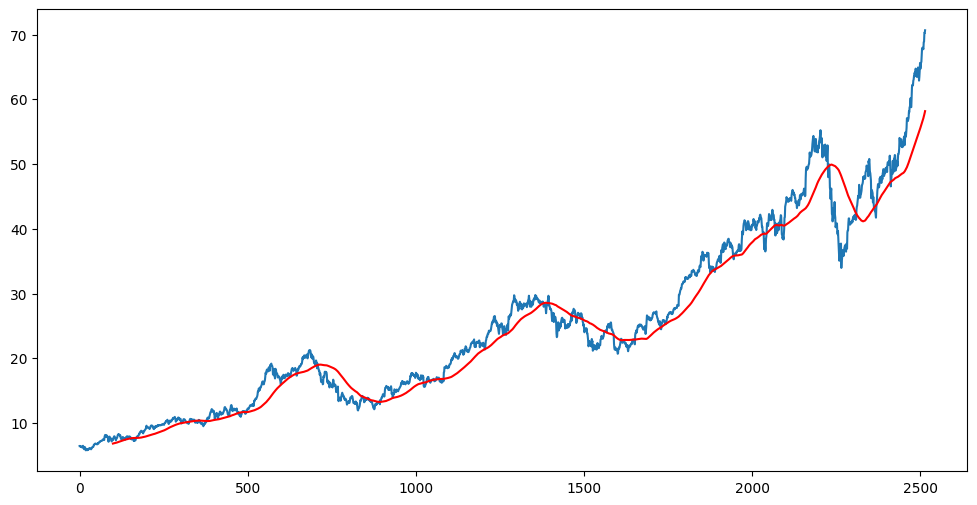

In [31]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [32]:
ma200 = df.Close.rolling(200).mean()
ma200

Ticker,AAPL
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
2510,52.221819
2511,52.349395
2512,52.482847
2513,52.613743


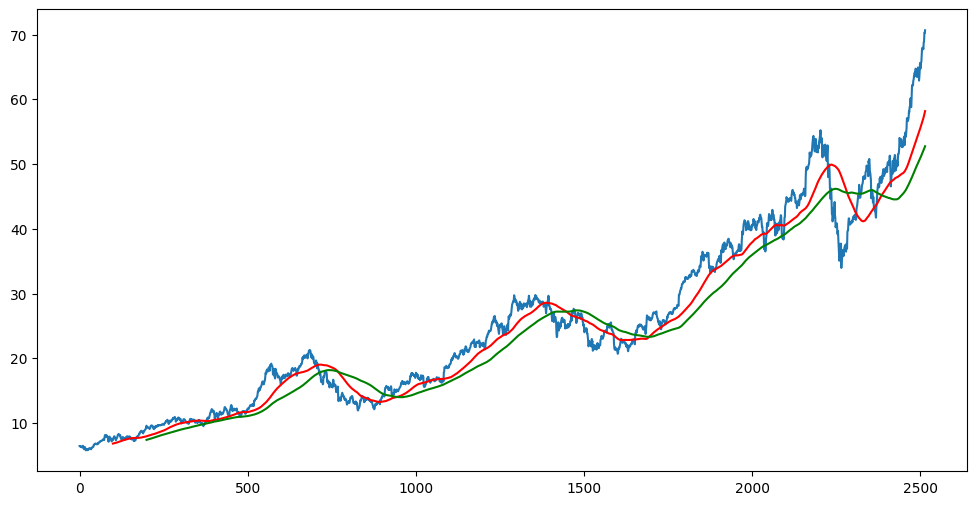

In [34]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [35]:
df.shape

(2515, 5)

In [36]:
# spliting data into training and testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)]) 
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(1760, 1)
(755, 1)


In [37]:
data_training.head()

Ticker,AAPL
0,6.447411
1,6.458560
2,6.355826
3,6.344078
4,6.386256


In [38]:
data_testing.head()

Ticker,AAPL
1760,27.026243
1761,26.815556
1762,26.891966
1763,26.861860
1764,26.998463


In [39]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [40]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.02759993],
       [0.02806504],
       [0.02377918],
       ...,
       [0.88408402],
       [0.8912315 ],
       [0.88640225]])

In [51]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [52]:
x_train.shape

(1660, 100, 1)

In [53]:
# ML Model

In [54]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [55]:
model = Sequential()
model.add(LSTM(units = 50, activation='relu', return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))

          
model.add(LSTM(units = 60, activation='relu', return_sequences = True))
model.add(Dropout(0.3))


model.add(LSTM(units = 80, activation='relu', return_sequences = True))
model.add(Dropout(0.4))


model.add(LSTM(units = 120, activation='relu'))
model.add(Dropout(0.5))


model.add(Dense(units = 1))

In [56]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                        │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_6 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [57]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 12s 125ms/step - loss: 0.1131
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 119ms/step - loss: 0.0139
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 124ms/step - loss: 0.0118
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 129ms/step - loss: 0.0095
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 121ms/step - loss: 0.0077
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 125ms/step - loss: 0.0071
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 120ms/step - loss: 0.0087
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 121ms/step - loss: 0.0080
Epoch 9/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 120ms/step - loss: 0.0074
Epoch 10/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 122ms/step - loss: 0.0070
Epoch 11/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 118ms/step - loss: 0.0078
Epoch 12/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 119ms/step - loss: 0.0073
Epoch 13/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 122ms/step - loss: 0.0061
Epoch 14/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 124ms/step - loss: 0.0064
Epoch 15/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 124ms/step - l

In [58]:
model.save('keras_model.h5')

In [59]:
data_testing.head()

Ticker,AAPL
1760,27.026243
1761,26.815556
1762,26.891966
1763,26.861860
1764,26.998463


In [60]:
data_testing.tail()

Ticker,AAPL
2510,68.833244
2511,68.898697
2512,70.265671
2513,70.238998
2514,70.655884


In [63]:
past_100_days = data_training.tail(100)

In [65]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [66]:
final_df.head()

Ticker,AAPL
0,24.962509
1,25.063864
2,24.877287
3,24.861160
4,24.918745


In [67]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.02573554],
       [0.0278966 ],
       [0.02391845],
       [0.0235746 ],
       [0.02480241],
       [0.03118726],
       [0.03069603],
       [0.02991028],
       [0.02922266],
       [0.03059773],
       [0.02642319],
       [0.02809302],
       [0.0240657 ],
       [0.02180643],
       [0.01871232],
       [0.01812304],
       [0.01409572],
       [0.01458675],
       [0.01768086],
       [0.02259234],
       [0.02244496],
       [0.02568649],
       [0.01173811],
       [0.        ],
       [0.0113453 ],
       [0.02367269],
       [0.04243426],
       [0.06109741],
       [0.05790497],
       [0.05132373],
       [0.05127469],
       [0.05117664],
       [0.05643164],
       [0.0470509 ],
       [0.04788573],
       [0.04891728],
       [0.05314099],
       [0.04444794],
       [0.04872085],
       [0.04611769],
       [0.04847514],
       [0.04872085],
       [0.05284643],
       [0.05368134],
       [0.06345494],
       [0.06468287],
       [0.06979062],
       [0.068

In [68]:
input_data.shape

(855, 1)

In [69]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

In [70]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(755, 100, 1)
(755,)


In [71]:
# Making predictions

y_predicted = model.predict(x_test)

24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step


In [72]:
y_predicted.shape

(755, 1)

In [73]:
y_test

array([0.06973804, 0.0652458 , 0.066875  , 0.0662331 , 0.06914571,
       0.07556325, 0.0808948 , 0.08148721, 0.08464671, 0.08217832,
       0.08114161, 0.08588074, 0.08583146, 0.0847947 , 0.08588074,
       0.08627567, 0.08573267, 0.09516149, 0.09545783, 0.09550716,
       0.09392741, 0.09254511, 0.12907582, 0.12798986, 0.13070503,
       0.13667823, 0.14279951, 0.14531735, 0.15002749, 0.14853993,
       0.15434054, 0.16291813, 0.16534744, 0.16455421, 0.16638879,
       0.17124749, 0.17328056, 0.17040468, 0.17104931, 0.1723879 ,
       0.17268535, 0.18656756, 0.18245268, 0.18651803, 0.18433675,
       0.18522925, 0.18265074, 0.18106419, 0.18334518, 0.18364247,
       0.18260128, 0.18988965, 0.19102991, 0.18755929, 0.19484783,
       0.18681588, 0.1946492 , 0.19217032, 0.19078191, 0.19197194,
       0.20644937, 0.20803583, 0.20709404, 0.20575533, 0.20595363,
       0.21125878, 0.20754025, 0.20575533, 0.20416879, 0.20332574,
       0.19569039, 0.19653327, 0.19281483, 0.19668204, 0.19355

In [74]:
y_predicted

array([[0.12846753],
       [0.12937768],
       [0.13022552],
       [0.13098565],
       [0.13164517],
       [0.13220072],
       [0.13266566],
       [0.13307352],
       [0.13346647],
       [0.13388333],
       [0.13435473],
       [0.13489132],
       [0.13549109],
       [0.13614179],
       [0.1368375 ],
       [0.13756238],
       [0.13829842],
       [0.1390258 ],
       [0.13973512],
       [0.1404343 ],
       [0.14113079],
       [0.14182736],
       [0.1425188 ],
       [0.14324339],
       [0.14408922],
       [0.14512534],
       [0.14640674],
       [0.14797305],
       [0.14982876],
       [0.151964  ],
       [0.15435289],
       [0.15695432],
       [0.15972868],
       [0.1626391 ],
       [0.16564284],
       [0.16869228],
       [0.17173916],
       [0.17474878],
       [0.17768428],
       [0.18050948],
       [0.18319501],
       [0.18571809],
       [0.18809463],
       [0.19034587],
       [0.19249701],
       [0.19456454],
       [0.19655636],
       [0.198

In [75]:
scaler.scale_

array([0.02132179])

In [76]:
scale_factor = 1/0.02132179
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

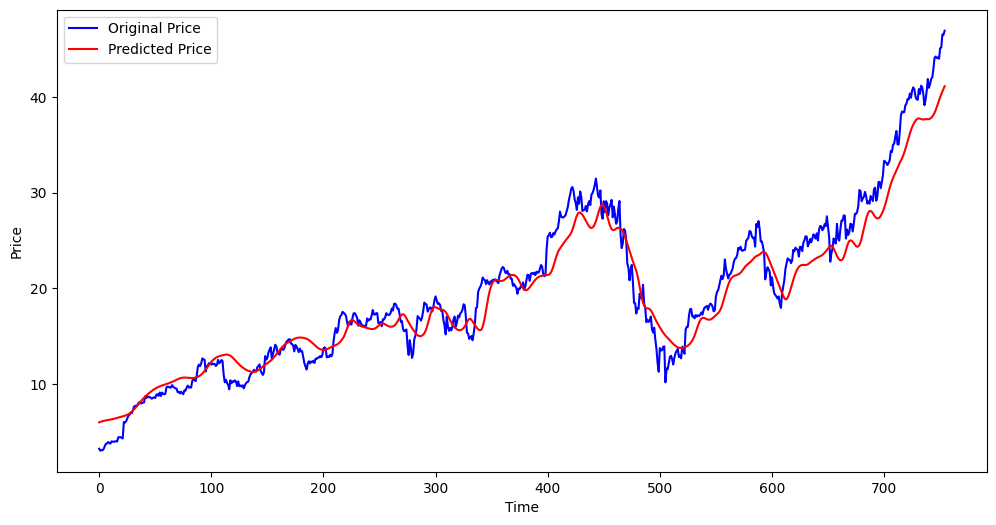

In [78]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = "Original Price")
plt.plot(y_predicted, 'r', label = "Predicted Price")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()